# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


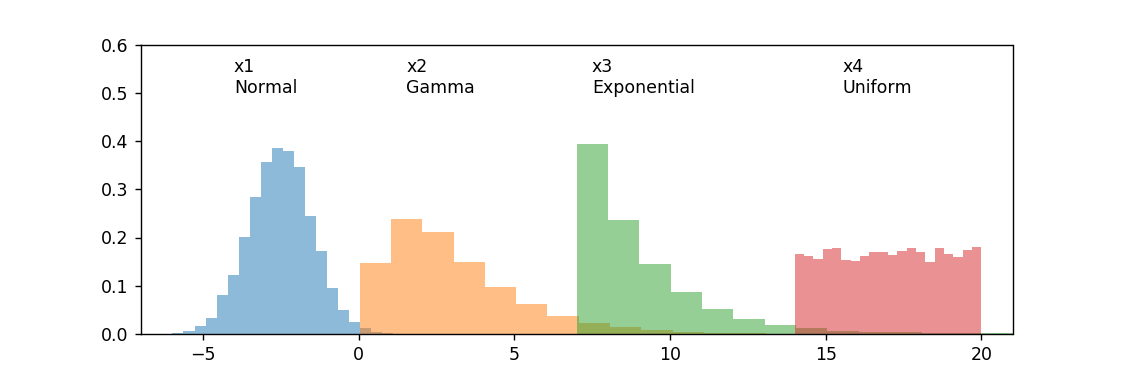

Text(15.527043889615847, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)
x_title = ['Normal', 'Gamma', 'Exponential', 'Uniform']
x = pd.DataFrame({'Normal':      x1, 
                   'Gamma':       x2, 
                   'Exponential': x3,
                   'Uniform':     x4})

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')
# plt.show()

# Describing The Data

In [3]:
x.describe()

,Normal,Gamma,Exponential,Uniform
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,-2.507676,3.033700,8.994508,17.027044
std,1.005588,2.128160,2.007018,1.737477
min,-5.978418,0.037582,7.000052,14.000196
25%,-3.186117,1.479786,7.565080,15.486778
50%,-2.501416,2.536139,8.388770,17.044976
75%,-1.823336,4.064972,9.777740,18.543417
max,1.120458,20.133207,27.142956,19.998513


# Creating Subplots to visualize the data

<IPython.core.display.Javascript object>


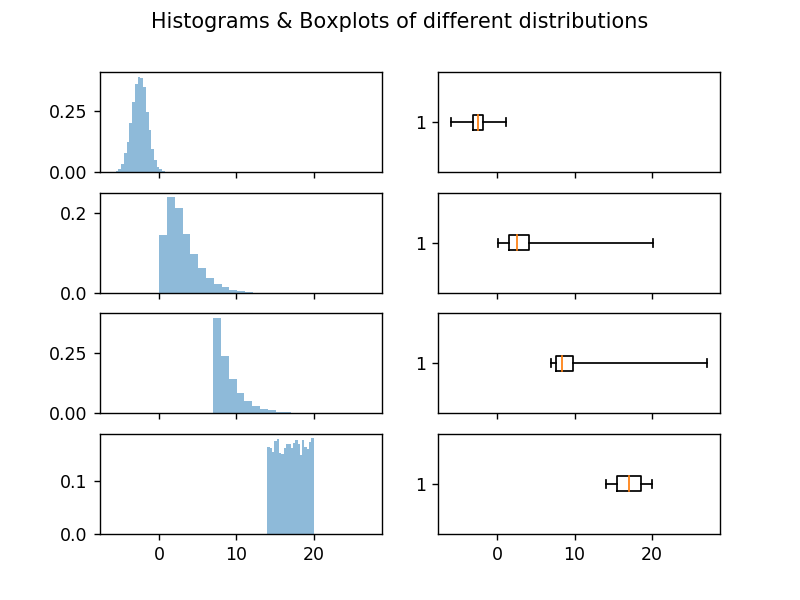

Text(0.5, 0.98, 'Histograms & Boxplots of different distributions')

In [4]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex=True)
axs = [(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)]
for n in range(0,len(axs)):
    axs[n][0].hist(x[x_title[n]], density=True, bins=20, alpha=0.5)
#     axs[n][0].set_title('{}'.format(x_title[n] + ' Distribution'))
    axs[n][1].boxplot(x[x_title[n]], whis='range', vert=False)
fig.suptitle('Histograms & Boxplots of different distributions')

<IPython.core.display.Javascript object>


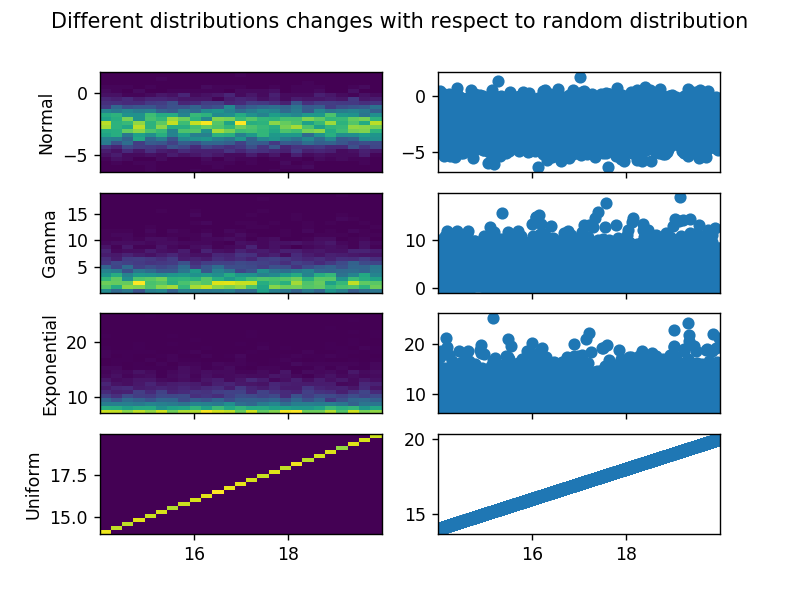

Text(0.5, 0.98, 'Different distributions changes with respect to random distribution')

In [13]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex=True)
axs = [(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)]
for n in range(0,len(axs)):
    axs[n][0].hist2d(x['Uniform'], x[x_title[n]], bins=25)
    axs[n][0].set_ylabel(x_title[n])
    axs[n][1].scatter(x['Uniform'], x[x_title[n]])
fig.suptitle('Different distributions changes with respect to random distribution')

# Animation

In [5]:
n = 10000
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    ax1.cla()
    bins = np.arange(-6, 1, 0.5)
    ax1.hist(x['Normal'][:curr], bins=bins)

    ax1.set_ylabel('Frequency')
    ax1.set_xlabel('Value')    
    ax1.axis([-6,1,0,2500])
    bins = np.arange(14, 20, 0.5)
    ax2.cla()
    ax2.hist(x['Uniform'][:curr], bins=bins)
    ax2.axis([13,20, 0, 2500])
#     ax2.annotate('n = {}'.format(curr), [20 ,0])
    ax2.set_xlabel('Value')
    
    
    bins = np.arange(-1, 14, 0.5)
    ax3.cla()
    ax3.hist(x['Gamma'][:curr], bins=bins)
    ax3.axis([-1,14, 0, 2500])
#     ax3.annotate('n = {}'.format(curr), [20 ,0])
    ax3.set_xlabel('Value')   
    ax3.set_ylabel('Frequency')

    bins = np.arange(6, 19, 0.5)
    ax4.cla()
    ax4.hist(x['Exponential'][:curr], bins=bins)
    ax4.axis([6,19, 0, 2500])
    ax4.annotate('n = {}'.format(curr), [19 ,0])
    ax4.set_xlabel('Value')   
    

In [6]:
%matplotlib notebook


<IPython.core.display.Javascript object>


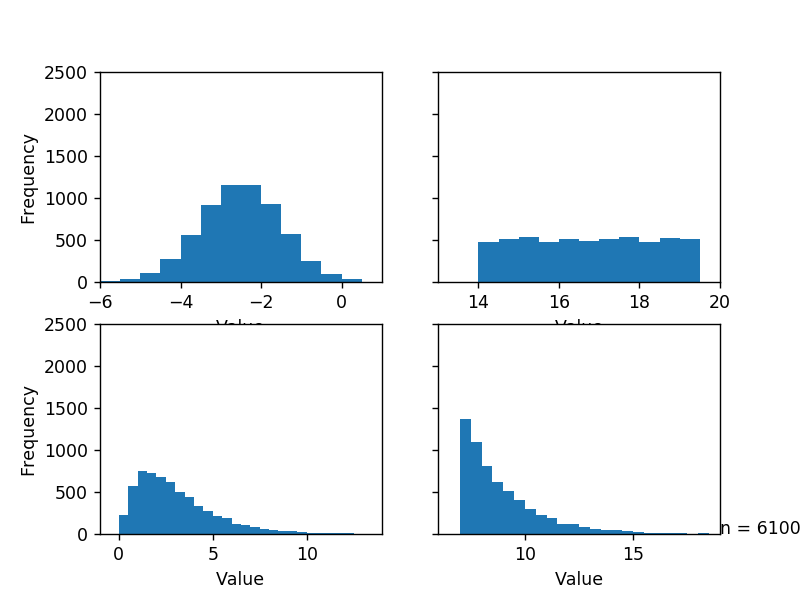

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)

# ax1.set_title('Sampling the Normal Distribution')

# ax2.set_title('Sampling the Normal Distribution')
# ax2.set_ylabel('Frequency')
# ax2.set_xlabel('Value')
a = animation.FuncAnimation(fig, update, frames=range(0,10000,100), interval=10)